# **Mall Customers segmentation using K-Means clustering**

The objective of this project is to perform customer segmentation using K-Means clustering on the Mall Customers dataset by analyzing annual income and spending behavior.
The goal is to identify distinct, behavior-driven customer groups and evaluate the optimal number of clusters using Elbow Method and Silhouette Analysis, enabling interpretable and actionable insights.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Selecting features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


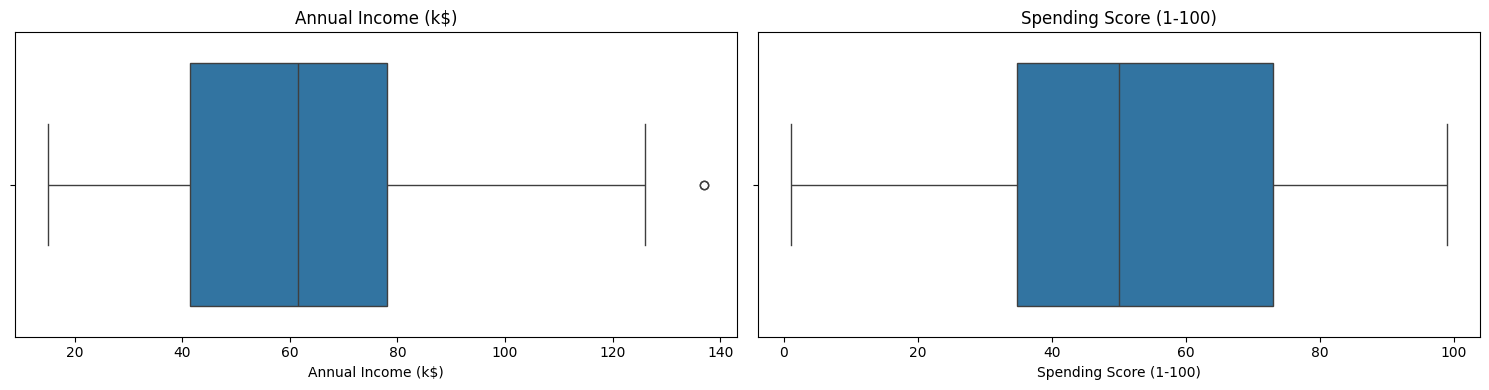

In [ ]:
# Boxplots (outlier check)
plt.figure(figsize=(15,4))
for i, col in enumerate(X, 1):
  plt.subplot(1,2,i)
  sns.boxplot(x=X[col])
  plt.title(col)
plt.tight_layout()
plt.show()

As K-Means is sensitive to outliers, there are some exteme income exist but no catastrophic outliers. No need for trimming here

<Figure size 1200x800 with 0 Axes>

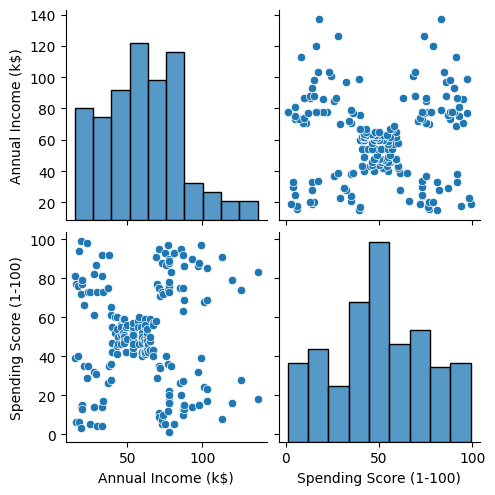

In [ ]:
# Bivariate analysis
plt.figure(figsize=(12,8))
sns.pairplot(X)
plt.show()

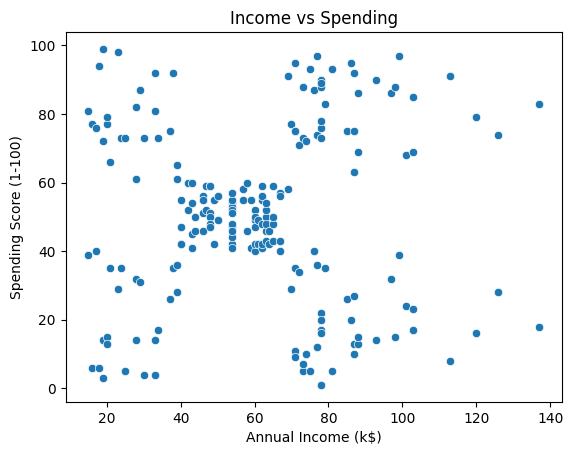

In [ ]:
# Annual Income vs Spending Score
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], data=X)
plt.title('Income vs Spending')
plt.show()

The Scater plot justifies the K-Means, as there is Natual grouping and Clear seperability. It also shows no linear relationship

# **Final Exploratory Data Analysis (EDA) Summary**

### **Dataset Overview**

The Mall Customers dataset consists of 200 customer records with 5 attributes: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1–100). All variables are fully populated with no missing values and no duplicate records, indicating good data quality and no immediate need for data cleaning or imputation

### **Feature Relevance Assessment**

- **CustomerID** was identified as a unique identifier with no analytical value for clustering and was therefore excluded from further analysis.

- **Gender** is a categorical variable and was not included in distance-based clustering to avoid introducing artificial numerical relationships.

- **Age**, while a valid demographic feature, was analyzed and found not to contribute meaningful separation when compared to behavioral variables.

- **Annual Income (k$)** and **Spending Score (1–100)** emerged as the most informative features for customer segmentation due to their direct representation of purchasing capacity and behavior.

Based on this assessment, clustering was intentionally performed using Annual Income and Spending Score only, focusing on behavioral segmentation rather than demographic profiling.

### **Key EDA Conclusion**

The exploratory analysis confirms that the Mall Customers dataset is well-suited for K-Means clustering when focused on behavioral features. Annual Income and Spending Score capture meaningful customer differences, exhibit clear natural groupings, and do not suffer from severe outliers or data quality issues. Demographic variables were intentionally excluded from clustering to preserve interpretability and avoid diluting cluster boundaries.

# **Model Building and Pre-processing**

In [ ]:
# importing model and preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

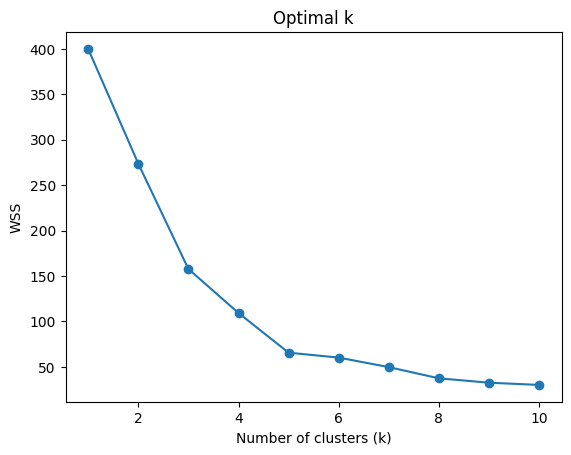

In [ ]:
# Elbow Meathod for Optimal k

# Calculate WSS (Inertia) for different values of K
WSS = [] # within-cluster sum of squares

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X_scaled)
  WSS.append(kmeans.inertia_)

plt.plot(range(1,11), WSS, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WSS')
plt.title('Optimal k')
plt.show()

In [ ]:
# For conformation we are claculating Silhoutte Score

# We'll try k = 2, 3, 4, 5, 6 and check the silhoutte Score for each
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  labels = kmeans.fit_predict(X_scaled)

  # Calculating the average silhoutte score for all points
  score = silhouette_score(X_scaled, labels)
  scores.append(score)
  print(f'For k={k}, the silhouette score is: {score:.4f}')


For k=2, the silhouette score is: 0.3973
For k=3, the silhouette score is: 0.4666
For k=4, the silhouette score is: 0.4943
For k=5, the silhouette score is: 0.5547
For k=6, the silhouette score is: 0.5138
For k=7, the silhouette score is: 0.5020
For k=8, the silhouette score is: 0.4550
For k=9, the silhouette score is: 0.4567
For k=10, the silhouette score is: 0.4448


The optimal number of clusters was determined using both the Elbow Method and Silhouette Analysis. The Elbow curve shows a clear inflection point around k = 5, beyond which reductions in within-cluster sum of squares diminish significantly. This choice is further supported by Silhouette scores, which peak at k = 5 (0.55), indicating the best balance between cluster cohesion and separation. Therefore, k = 5 was selected as the optimal number of clusters.

In [ ]:
# Fiting final KMeans with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_
centroids_orignal = scaler.inverse_transform(centroids)

# Adding cluster info to dataframe
X = X.copy()
X['Cluster'] = y_labels
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


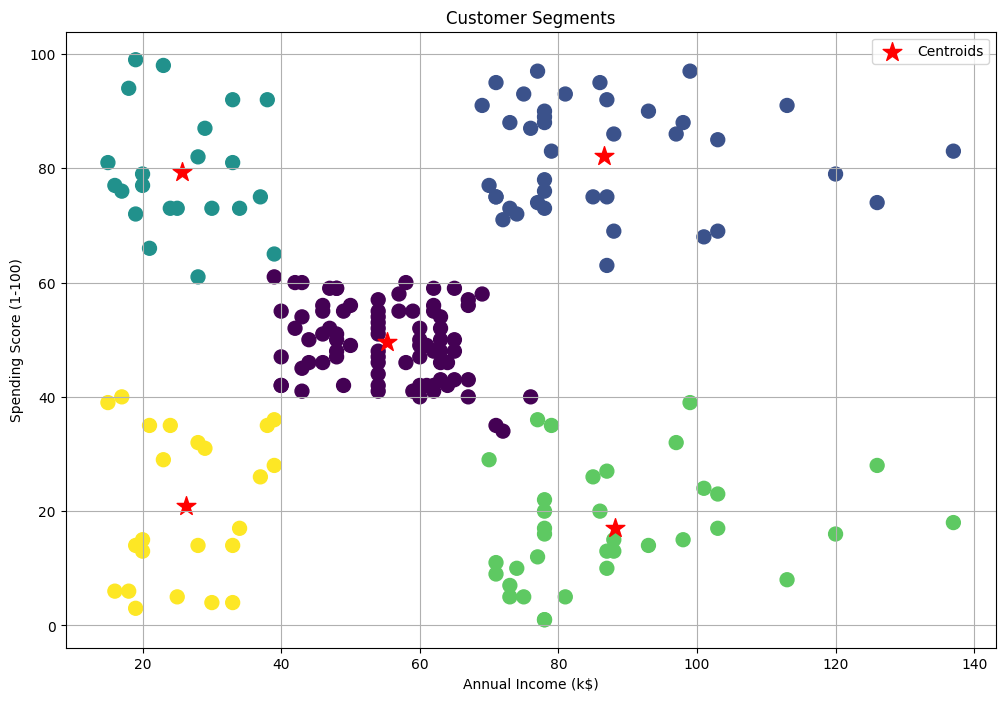

In [ ]:
# Ploting clusters
plt.figure(figsize=(12, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X['Cluster'], cmap='viridis', s=100)
plt.scatter(centroids_orignal[:, 0], centroids_orignal[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cluster_summary = X.groupby('Cluster').mean()
cluster_summary

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# **Final Project Conclusion & Insights**

Mall Customers Segmentation using K-Means Clustering

---

## **Project Conclusion**

In this project, K-Means clustering was successfully applied to segment mall customers based on **Annual Income (k$)** and **Spending Score (1–100)**. Exploratory Data Analysis confirmed that the dataset was clean, free of missing values and duplicates, and well-suited for unsupervised learning. Behavioral features were deliberately chosen over demographic variables to preserve cluster clarity and interpretability.

The optimal number of clusters was determined using a combination of the **Elbow Method** and **Silhouette Analysis**. The Elbow curve showed a clear inflection point at **k = 5**, and the **Silhouette Score peaked at 0.55**, indicating the best balance between cluster cohesion and separation. Based on this strong agreement between quantitative metrics and visual inspection, **k = 5 was selected as the final model configuration**.

The final K-Means model, trained on standardized features and visualized using inverse-transformed centroids, revealed clear, well-separated customer segments with meaningful business interpretations. This confirms that K-Means is an appropriate and effective clustering technique for this dataset.

---

## **Key Customer Segments & Insights**

Based on the cluster centroids and mean values:

**Cluster 0 – Average Customers**
- Moderate income, moderate spending
- Represents the largest and most stable customer base
- Opportunity for upselling through targeted promotions

**Cluster 1 – High-Value Customers (VIPs)**
- High income, high spending
- Most profitable segment
- Should be prioritized for loyalty programs and premium services

**Cluster 2 – Impulsive Low-Income Spenders**
- Low income, high spending
- Indicates strong purchasing intent despite limited income
- Ideal candidates for discounts, offers, and impulse-driven marketing

**Cluster 3 – Careful High-Income Customers**
- High income, low spending
- Financially capable but conservative
- Potential to increase engagement through personalized campaigns

**Cluster 4 – Low-Value Customers**
- Low income, low spending
- Least profitable segment
- Minimal marketing investment recommended

These segments demonstrate how **income alone does not determine spending behavior**, highlighting the importance of behavioral-based segmentation.

---

## **Final Takeaway**


“By focusing on behavioral variables and validating cluster quality using both Elbow and Silhouette methods, this project demonstrates how K-Means can uncover meaningful and actionable customer segments that support data-driven business decisions.”

